

Точка:  2.604376585308132 4.3087923929241185

10 минимальных расстояний от нашей точки
[0.13191006144397358, 0.1435420419974429, 0.17444167549932835, 0.17740330091883927, 0.1932387836932107, 0.20425981109272406, 0.2273514404926621, 0.24400332761967292, 0.27012614660472056, 0.27676902611104415, 0.28451502092888376]

кластеры точек, у которых мин. расстояние до нашей  [2, 0, 2, 9, 2, 2, 0, 2, 0, 0, 2] Кластер нашей точки: 2


Точка:  4.24797335283658 4.70286589807559

10 минимальных расстояний от нашей точки
[0.08444783232502062, 0.11041131632221343, 0.12797082814464567, 0.1658396718288981, 0.18899009724716787, 0.19149454314077094, 0.19326925931884315, 0.22723790323027818, 0.2440868086309373, 0.24787358765734716, 0.26265487130681314]

кластеры точек, у которых мин. расстояние до нашей  [3, 2, 2, 3, 2, 2, 2, 2, 3, 9, 6] Кластер нашей точки: 2


Точка:  3.4044099703584383 4.033806681749515

10 минимальных расстояний от нашей точки
[0.056885588413678544, 0.06413216225319647, 0.07791105120

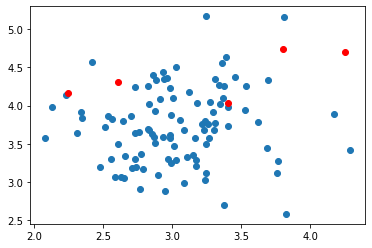

In [89]:
import numpy as np 
import matplotlib.pyplot as plt 
import random 

# Train data generator 
def generateData(numberOfClassEl, numberOfClasses): 
    data = [] 
    for classNum in range(numberOfClasses): 
        # Choose random center of 2-dimensional gaussian 
        centerX, centerY = random.random() * 5.0, random.random() * 5.0 
        # Choose numberOfClassEl random nodes with RMS=0.5 
        for rowNum in range(numberOfClassEl): 
            data.append([[random.gauss(centerX, 0.5), random.gauss(centerY, 0.5)], classNum]) 
    return data 

def dist(x1, y1, x2, y2): 
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2) 

n = 100
k = np.int(np.sqrt(n)) 
data = [] 
data = generateData(n, k) 
x, y = [], [] 
for i in range(n): 
    x.append(data[i][0][0]) 
    y.append(data[i][0][1]) 
plt.scatter(x, y) 

# print(data)

min_x, max_x = np.min(x), np.max(x) 
min_y, max_y = np.min(y), np.max(y) 

#создадим 5 новых точек
for i in range(5):
    x_new = min_x + np.random.random() * (max_x - min_x) 
    y_new = min_y + np.random.random() * (max_y - min_y) 

    plt.scatter(x_new, y_new, color='r') 

    distance = [] 
    for j in range(n*k):
        distance.append([data[j][1], dist(data[j][0][0], data[j][0][1], x_new, y_new)]) 

    #вычисляем 11 точек, расстояние которых минимально до новой
    points_with_min_distances = []
    clusters = []
    min = 1000
    min_cl = 12
    for j in range(11):
        for i in range(len(distance)):
            if(len(points_with_min_distances) == 0):
                 if(distance[i][1] < min):
                    min = distance[i][1]
                    min_cl = distance[i][0]
            else:
                if((distance[i][1] < min) & (distance[i][1] > points_with_min_distances[j-1])):
                    min = distance[i][1]
                    min_cl = distance[i][0]
        points_with_min_distances.append(min)
        clusters.append(min_cl)
        min = 1000
    print("\n\nТочка: ", x_new, y_new)
    print("\n10 минимальных расстояний от нашей точки")
    print(points_with_min_distances)
    
    import numpy as np
    bc = np.bincount(clusters)
    
    print("\nкластеры точек, у которых мин. расстояние до нашей ",clusters, "Кластер нашей точки:", bc.argmax())

plt.show()